# Creditworthiness Tool

### This machine learning tool uses a logistic regression algorithm to predict if an applicant would be at risk of default on a loan. The data consists of four main features and is from 214 clients. 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from ipywidgets import widgets
import warnings

In [11]:
data_frame = pd.read_csv('risk_credit_data.csv')

X = data_frame.iloc[:, 0:4] # independent variables
y = data_frame.iloc[:, 4]   # dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)# Split data for testing & training
log_model = LogisticRegression(max_iter=1000) # model object
log_model.fit(X_train, y_train) # train model

warnings.filterwarnings('ignore')

# Visualization 

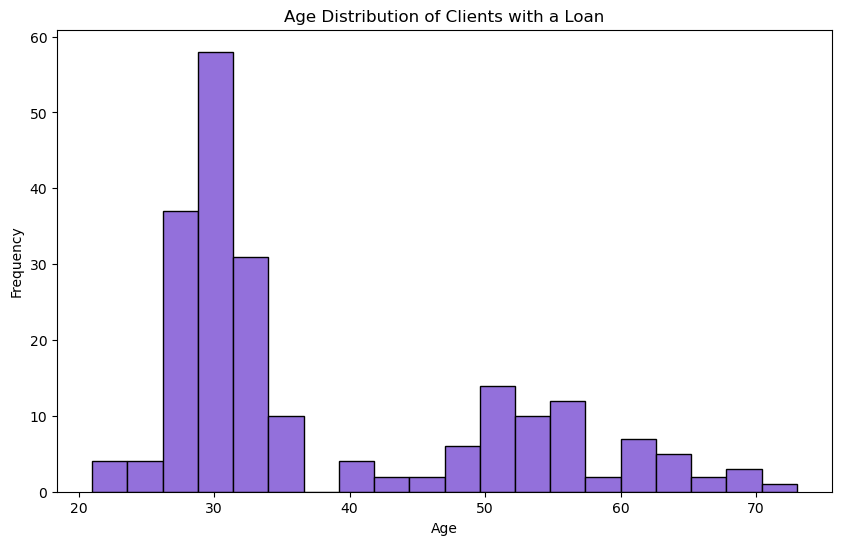

In [12]:
# Histogram of client's ages
plt.figure(figsize=(10,6))
plt.hist(data_frame['person_age'], bins=20, color='mediumpurple', edgecolor='black')
plt.title('Age Distribution of Clients with a Loan')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

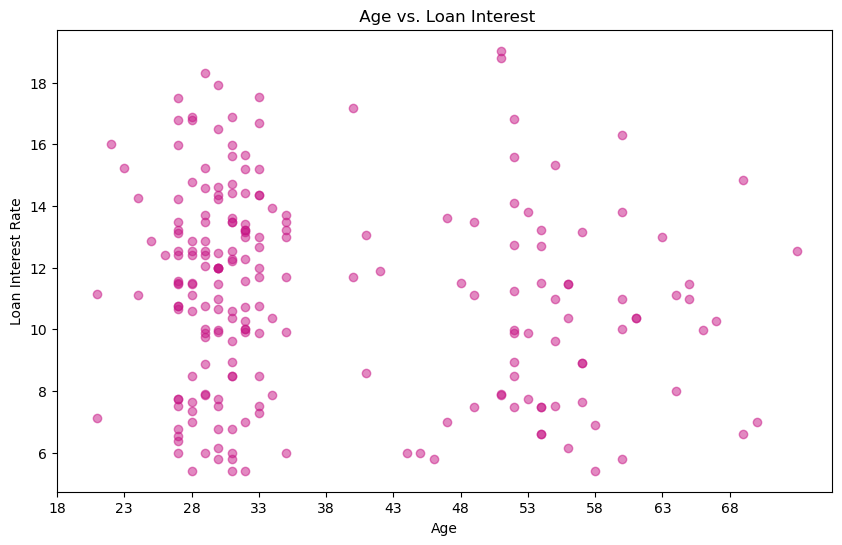

In [13]:
# Scatter plot that shows relationship between clients's ages and loan interest
plt.figure(figsize=(10,6))
plt.scatter(data_frame['person_age'], data_frame['loan_int_rate'], color='mediumvioletred', alpha=0.5)
plt.title(' Age vs. Loan Interest')
plt.xlabel('Age')
plt.ylabel('Loan Interest Rate')
plt.xticks(range(18, 71, 5))
plt.show()

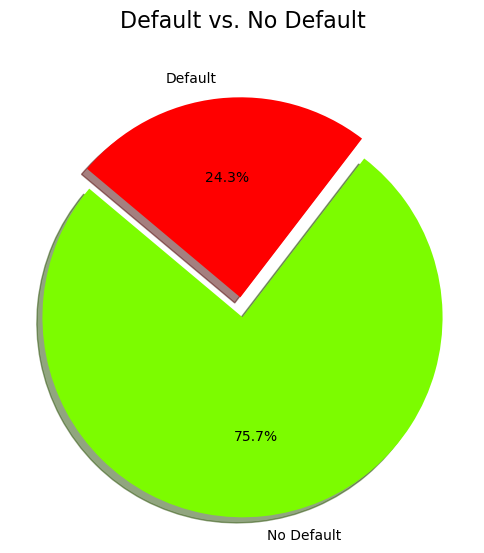

In [14]:
# Pie chart showing percentage of default and no default 
default_counts = data_frame['loan_status'].value_counts()
plt.figure(figsize=(6, 6))
labels = ['No Default', 'Default']
sizes = [default_counts[0], default_counts[1]]
colors = ['lawngreen', 'red']
explode = (0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
fontsize= 16
plt.title('Default vs. No Default', fontsize=fontsize, pad=35)
plt.axis('equal')
plt.show()

# Dashboard

In [15]:
age = widgets.FloatText(description='Age:')
income = widgets.FloatText(description='Income:')
loan_amount = widgets.FloatText(description='Amount:')
loan_interest_rate = widgets.FloatText(description='Interest:')

button = widgets.Button( description='Click to get Prediction' )
button.style.button_color = 'lightgreen'
button
button_prediction = widgets.Label(value='Predicted Credit Risk =' )

# function that gives prediction when button is clicked
def prediction(prediciton_event):
    tool_predicition = log_model.predict([[
        age.value, income.value, loan_amount.value, loan_interest_rate.value]])
    button_prediction.value='Predicted Credit Risk = '+ str(tool_predicition[0])

button.on_click(prediction)

vbox=widgets.VBox([age, income, loan_amount, loan_interest_rate, button,button_prediction])
print('\033[1m' +'Creditworthiness Tool'+ '\033[0m')
print( 'Enter values to determine if the applicant will default on the loan' )
display(vbox)


Creditworthiness Tool
Enter values to determine if the applicant will default on the loan


# Accuracy Analysis

In [16]:
y_pred = log_model.predict(X_test)# predictions on the test set
model_accuracy = metrics.accuracy_score(y_test, y_pred) # model's accuracy on the test set
print("Model Accuracy:", model_accuracy)

Model Accuracy: 0.7384615384615385
